Loaded employee_data.csv with shape: (15, 6)
Columns: ['Employee_ID', 'Name', 'Department', 'Experience_Years', 'Salary', 'Age']


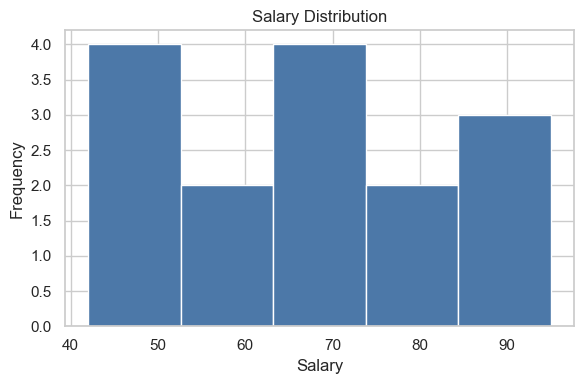

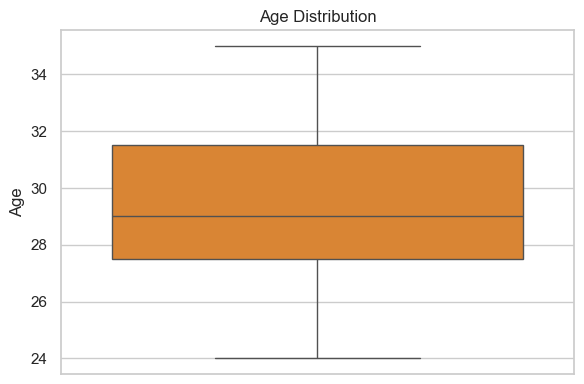

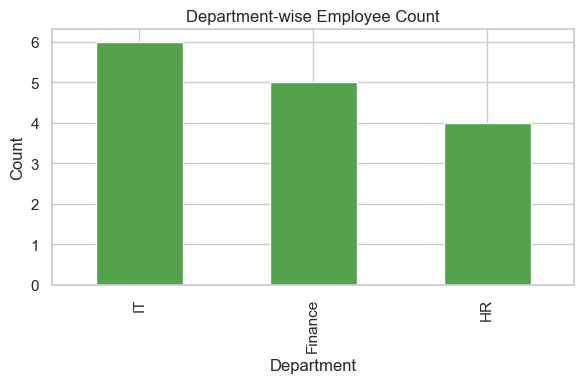

Skipping 'Experience vs Salary' plot: 'Experience' column not found.


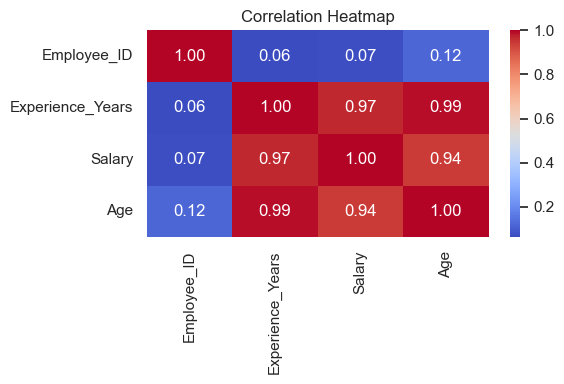

In [ ]:
# Employee Data Visualization
# Fun fact: Charts make data easier to understand!

# Inline backend for faster in-notebook rendering
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fast rendering and compact figures
plt.style.use("fast")
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.autolayout"] = True

# Load dataset
df = pd.read_csv("employee_data.csv")
rows, cols = df.shape
print(f"Loaded employee_data.csv with shape: {df.shape}")
print("Columns:", list(df.columns))

# Helper to resolve column aliases
def resolve_col(df, candidates):
    for name in candidates:
        if name in df.columns:
            return name
    lower_map = {c.lower(): c for c in df.columns}
    for name in candidates:
        if name.lower() in lower_map:
            return lower_map[name.lower()]
    return None

# Histogram for Salary (adaptive bins)
plt.figure()
salary = df["Salary"].dropna()
bins = max(5, min(30, int(len(salary) ** 0.5)))
plt.hist(salary, bins=bins, color="#4C78A8")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.close()

# Box plot for Age
plt.figure()
sns.boxplot(y=df["Age"].dropna(), color="#F58518")
plt.title("Age Distribution")
plt.tight_layout()
plt.show()
plt.close()

# Bar chart: Department-wise employee count
plt.figure()
df["Department"].value_counts().plot(kind="bar", color="#54A24B")
plt.title("Department-wise Employee Count")
plt.xlabel("Department")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()

# Scatter plot: Experience vs Salary (resolve aliases or skip)
exp_aliases = [
    "Experience", "Experience_Years", "Years Experience", "Years_of_Experience",
    "Work Experience", "Exp", "Experience (Years)"
]
exp_col = resolve_col(df, exp_aliases)

if exp_col is not None:
    plot_df = df[[exp_col, "Salary"]].dropna()
    if len(plot_df) > 2000:
        plot_df = plot_df.sample(2000, random_state=42)
    plt.figure()
    plt.scatter(plot_df[exp_col], plot_df["Salary"], s=20, alpha=0.7, color="#E45756")
    plt.title("Experience vs Salary")
    plt.xlabel(exp_col)
    plt.ylabel("Salary")
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Skipping 'Experience vs Salary' plot: 'Experience' column not found.")

# Correlation heatmap (numeric columns only, conditional annotations)
plt.figure()
numeric_df = df.select_dtypes(include="number")
corr = numeric_df.corr()
annot = corr.shape[1] <= 10
sns.heatmap(corr, annot=annot, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
plt.close()